TODO before:

    Make sure both are optimised while using the same Best Estimate values of the static uncertainty
    Use those same Best Estimate values for here.

In [1]:
import pickle
import numpy as np
import pandas as pd

from geopy.distance import great_circle

import pygmo as pg

import matplotlib.pyplot as plt

import lib.pareto as pareto

In [2]:
from lib.fl_model_v9 import *

# Load Optimised Policies 

In [3]:
case = "Nepal"

## Load all policies proposed by dynamic uncertainty

In [4]:
output_folder = "MPMORDM Results v1 2015"

In [5]:
with open('{}/{}/python_objects.pickle'.format(case, output_folder),
          'rb') as handle:
    global_label_tree, EMA_model_dict, global_dfs_var_unc_data, global_fixed_unc, global_policy_tree = pickle.load(
        handle)

In [6]:
p4_labels = global_label_tree['p4']

In [7]:
p4_pols = [global_policy_tree[label] for label in p4_labels]

In [8]:
p4_pols = np.array(p4_pols)

In [9]:
print("P4 after Multi-Period Robust Optimisation contains {} number of policies".format((p4_pols.shape)))

P4 after Multi-Period Robust Optimisation contains (1376,) number of policies


# Get Performance

## Set parameters of best estimates. Should be the same as used for 

In [10]:
Fix_Unc = pd.read_csv("{}/Prepared Input Data/fixed_uncertainties.csv".format(case), index_col=0)

DPs = pd.read_csv("Nepal/Prepared Input Data/DPs.csv")
# DPs.columns

FLs = pd.read_csv("Nepal/Prepared Input Data/FLs.csv")
# FLs.columns

SPs = pd.read_csv("Nepal/Prepared Input Data/SPs.csv")
# SPs.columns

# 0. Instantiate

# General
# Coordinates
# all large cities to demand points
DPY = {"DPY{}".format(i): y for i,y in enumerate(DPs['latitude'])}
DPX = {"DPX{}".format(i): x for i,x in enumerate(DPs['longitude'])}

# all international airports to supply points:
SPY = {"SPY{}".format(i): y for i,y in enumerate(SPs['latitude_deg'])}
SPX = {"SPX{}".format(i): x for i,x in enumerate(SPs['longitude_deg'])}

# Facility locations
FLX = {"FLX{}".format(i): x for i,x in enumerate(FLs['Lon'])}
FLY = {"FLY{}".format(i): y for i,y in enumerate(FLs['Lat'])}


# Population demand points
DPpop = {"DPpop{}".format(i): pop for i,pop in enumerate(DPs['population'])}


In [11]:
Fix_Unc

,lower,best_estimate,upper
var,,,
unit_opening_costs,50.0,100,200
unit_transport_cost,0.5,1,2
FL_operations_cost,20.0,30,50
FL_range,2.0,4,6
demand_per_affected,10.0,20,50


In [12]:
print("Pick right Epicentre, or load disruption data")
print("TODO: Load disruption")

Pick right Epicentre, or load disruption data
TODO: Load disruption


In [13]:
epicentre_name = "RealLocation"

In [14]:
disruptionsFLs = np.loadtxt(
    'Nepal/Prepared Input Data/DisruptionFL{}.txt'.format(epicentre_name))
disruptionsDPs = np.loadtxt(
    'Nepal/Prepared Input Data/DisruptionDP{}.txt'.format(epicentre_name))

In [15]:
# Base real values on Nepal earthquake
# DSR is abbreviation for Disruption

DSRDP = {"DSRDP{}".format(i): disruptionsDPs[i] for i in range(len(DPX))}
DSRFL = {"DSRFL{}".format(i): disruptionsFLs[i] for i in range(len(FLX))}

## Evaluate DynamicUncPols under best estimates of static uncertainty

In [16]:
len(p4_pols)

1376

In [17]:
Dyn_Unc_best_est_results = []
for pol in p4_pols:
    Dyn_Unc_best_est_results.append(
        FL_model(
            unit_opening_costs=Fix_Unc.best_estimate['unit_opening_costs'],
            unit_transport_cost=Fix_Unc.best_estimate['unit_transport_cost'],
            FL_operations_cost=Fix_Unc.best_estimate['FL_operations_cost'],
            demand_per_affected=Fix_Unc.best_estimate['demand_per_affected'],
            graphical_representation=False,
            FL_range=Fix_Unc.best_estimate['FL_range'],
            dist_method='from_table',
            table_dir="{}/Prepared Input Data/routing_table.csv".format(case),
            **SPX,
            **SPY,
            **DPX,
            **DPY,
            **FLX,
            **FLY,
            **pol,
            **DSRDP,
            **DSRFL,
            **DPpop))

In [18]:
Dyn_Unc_best_est_results = np.array(Dyn_Unc_best_est_results)

In [19]:
Dyn_Unc_best_est_results

array([[118502.43098280455, 14, 10731.90413747319, 53409.11799336293,
        True, None],
       [121687.22201560512, 13, 10718.702545122338, 53409.11799336293,
        True, None],
       [272084.4154191506, 13, 10586.014422277876, 40806.74909473771,
        True, None],
       ...,
       [230370.18915833393, 12, 3224.469901353659, 45920.15739466251,
        True, None],
       [65253.881256298904, 19, 12666.797997925285, 45920.15739466251,
        True, None],
       [47386.75661875982, 21, 14245.85305828652, 59777.42, True, None]],
      dtype=object)

In [20]:
oois = [
        'total_costs', 'nr_uncovered_DPs', 'total_uncovered_demand',
        'max_travel_time'
    ]
objectives_nice = [
    'Total Costs', '# Uncovered Demand Points', 'Total Uncovered Demand',
    'Max Travel Time'
]

oois = objectives_nice

In [21]:
testdf = Dyn_Unc_best_est_results

In [22]:
# plot 1 trade-off

In [23]:
# plt.scatter(testdf[:,0],testdf[:,2])

In [24]:
import seaborn as sns

C:\Users\timro\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


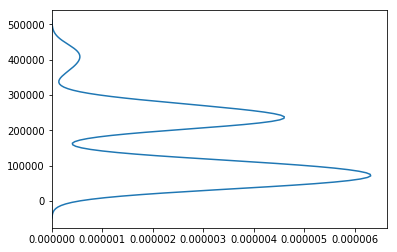

In [25]:
sns.kdeplot(testdf[:,0],vertical=True)

In [27]:
# g = sns.PairGrid(pd.DataFrame(testdf), diag_sharey=False)
# g.map_lower(sns.kdeplot, cmap='Blues_d')
# g.map_upper(plt.scatter,  alpha=0.5)
# g.map_diag(sns.kdeplot, lw=3)
# # g.set_title("Pareto Front Objective Scores")

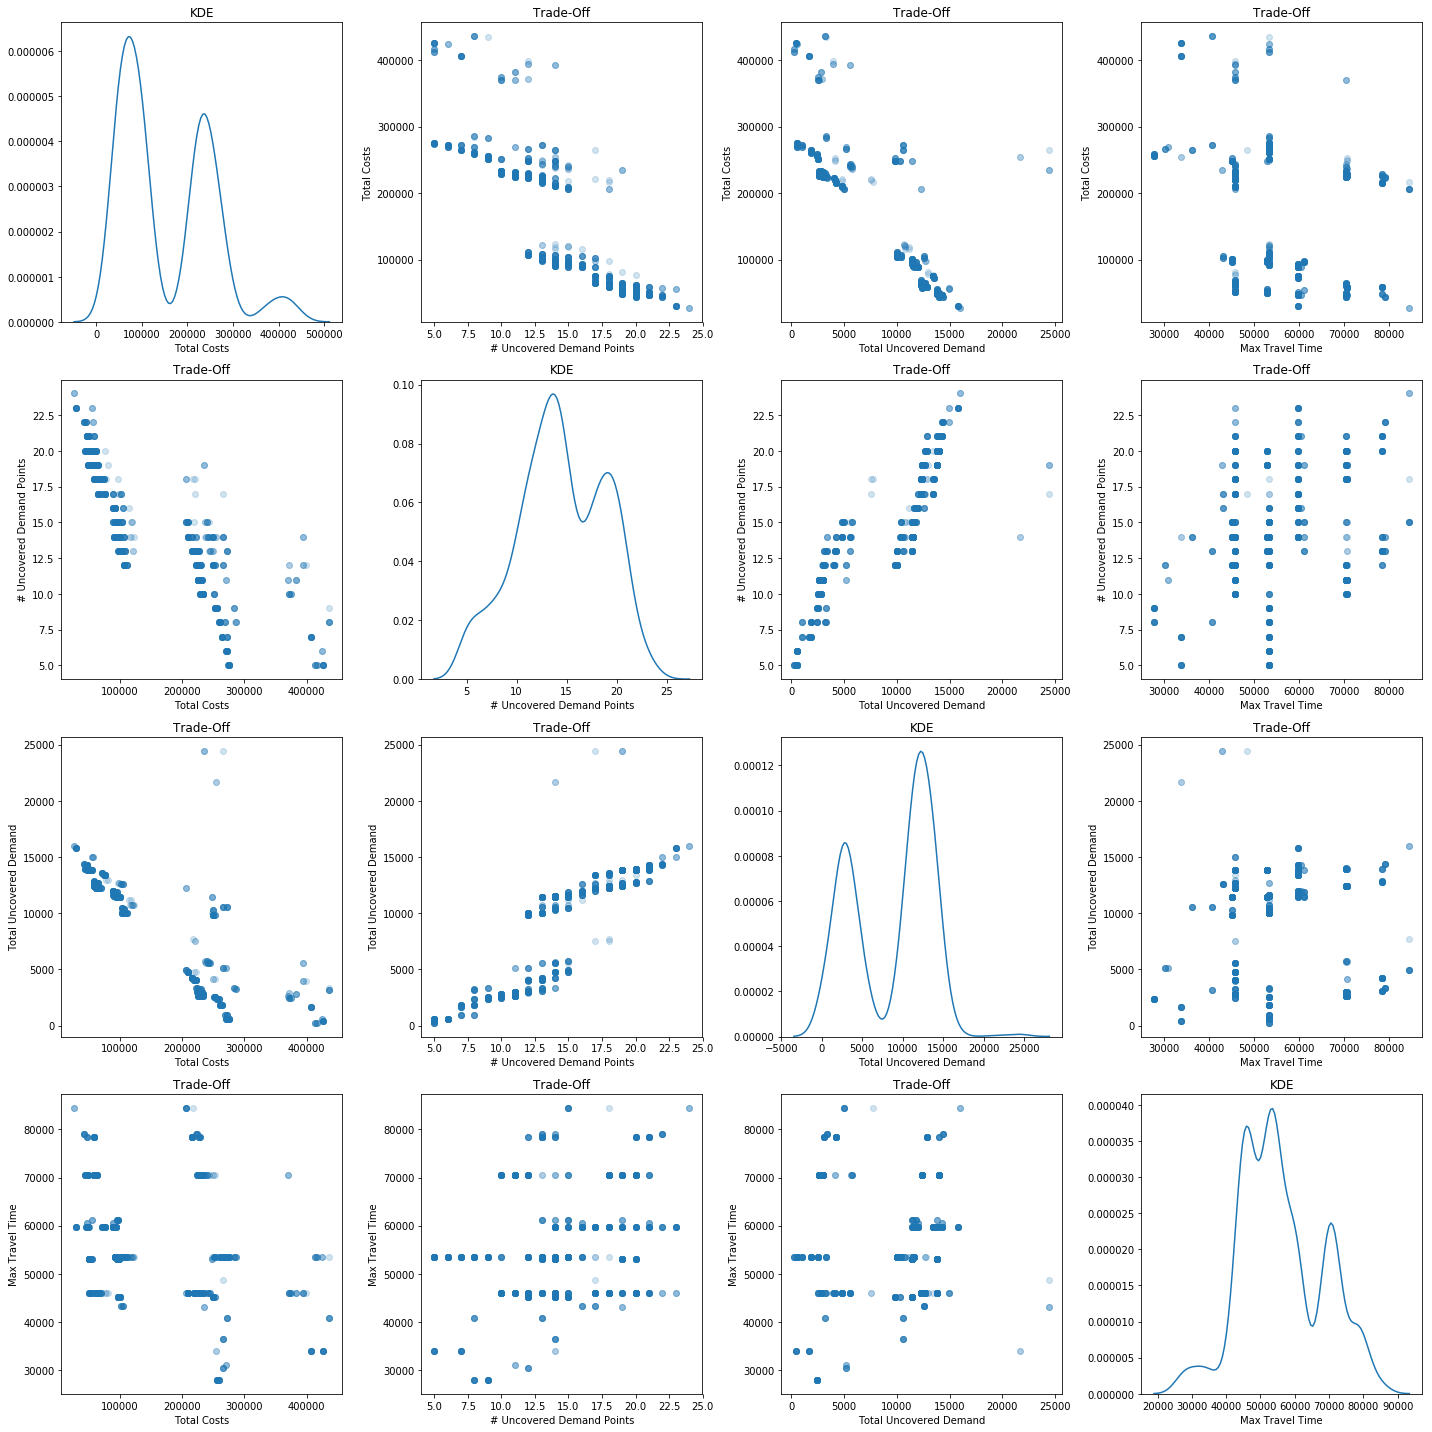

In [28]:
fig = plt.figure(figsize=(20,20))

position = 0
for i,ooi in enumerate(oois):
    for j,ooi2 in enumerate(oois):
        if i == j:
            ax = fig.add_subplot(4,4,position+1)
            sns.kdeplot(testdf[:,i], ax=ax)
            ax.set_title("KDE")
            ax.set_xlabel(oois[i])
            position+=1
            continue
        ax = fig.add_subplot(4,4,position+1)
        position +=1
        ax.scatter(testdf[:,j],testdf[:,i], alpha=0.2)
        ax.set_title("Trade-Off")
        ax.set_ylabel(oois[i])
        ax.set_xlabel(oois[j])
#         plt.show()
fig.tight_layout()
plt.show()

In [29]:
# fig = plt.figure(figsize=(20,20))

# position = 0
# for i,ooi in enumerate(oois):
#     for j,ooi2 in enumerate(oois):
#         if i == j:
# #             ax = fig.add_subplot(4,4,position+1)
# #             sns.kdeplot(testdf[:,i], ax=ax)
# #             ax.set_title("KDE")
# #             ax.set_xlabel(oois[i])
#             position+=1
#             continue
#         if j>i:
#             position+=1
#             continue
#         ax = fig.add_subplot(4,4,position+1)
#         position +=1
#         ax.scatter(testdf[:,j],testdf[:,i], alpha=0.2)
# #         ax.set_title("Trade-Off")
        
#         if j == 0:
#             ax.set_ylabel(oois[i],fontsize=20)
#         if i == 3:
#             ax.set_xlabel(oois[j], fontsize=20)
# #         plt.show()
# fig.tight_layout()
# plt.show()

## Do the same for the Pareto Front

In [30]:
test2 = pd.DataFrame(testdf[:,:4])

In [31]:
testPF = np.array(
    pareto.eps_sort(
        [list(test2.itertuples(index=True))],
        [1, 2, 3, 4], [1e-9, 1e-9, 1e-9, 1e-9]))

In [32]:
PFtest = testPF[:,1:]

In [33]:
dftmp = pd.DataFrame(PFtest)
dftmp.columns = objectives_nice

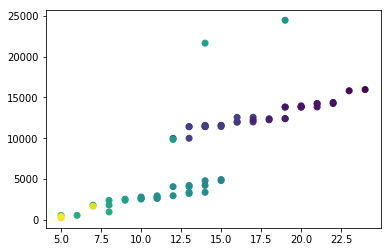

In [34]:
plt.scatter(dftmp['# Uncovered Demand Points'],dftmp['Total Uncovered Demand'],c=dftmp['Total Costs'])

C:\Users\timro\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


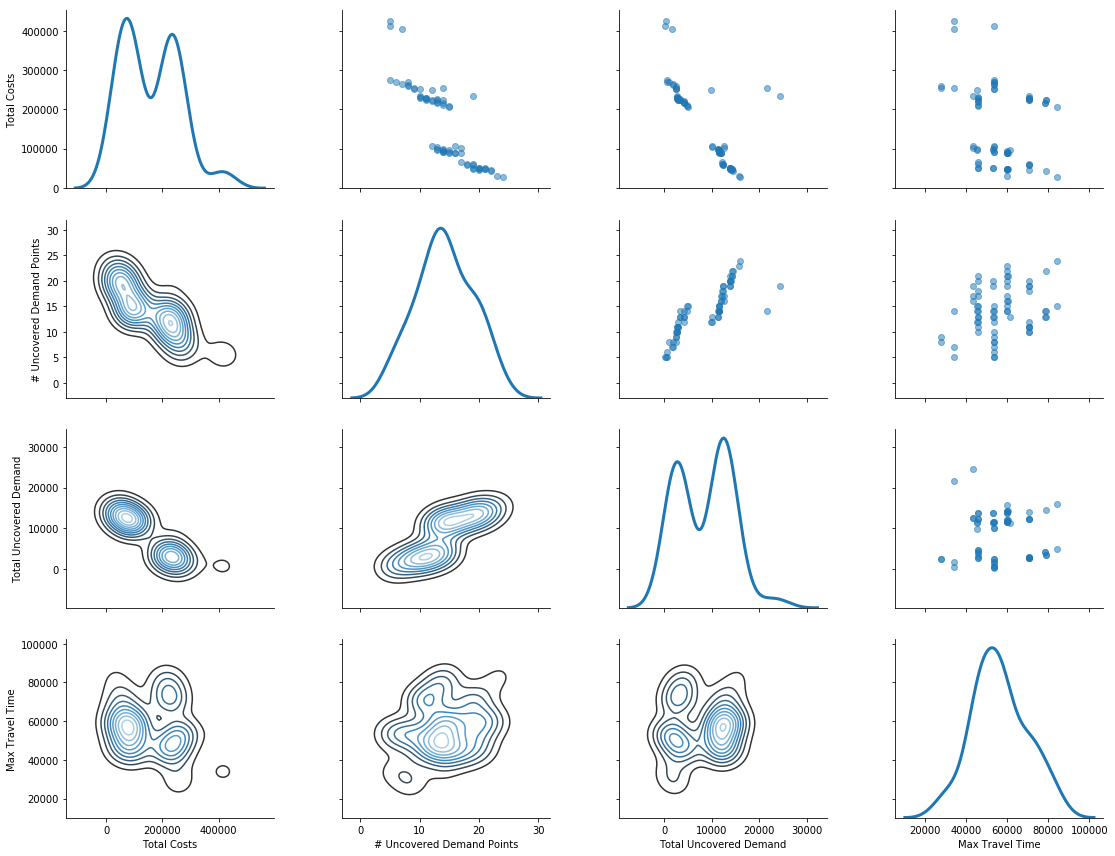

In [90]:
g = sns.PairGrid(dftmp, diag_sharey=False, size = 3, aspect=1.3)
g.map_lower(sns.kdeplot, cmap='Blues_d')
g.map_upper(plt.scatter,  alpha=0.5)
g.map_diag(sns.kdeplot, lw=3)
# g.set_title("Pareto Front Objective Scores")
plt.tight_layout()
# plt.show()
plt.savefig("{}/{}/Analysis/Objective-PairGrid".format(case,output_folder),dpi=600)

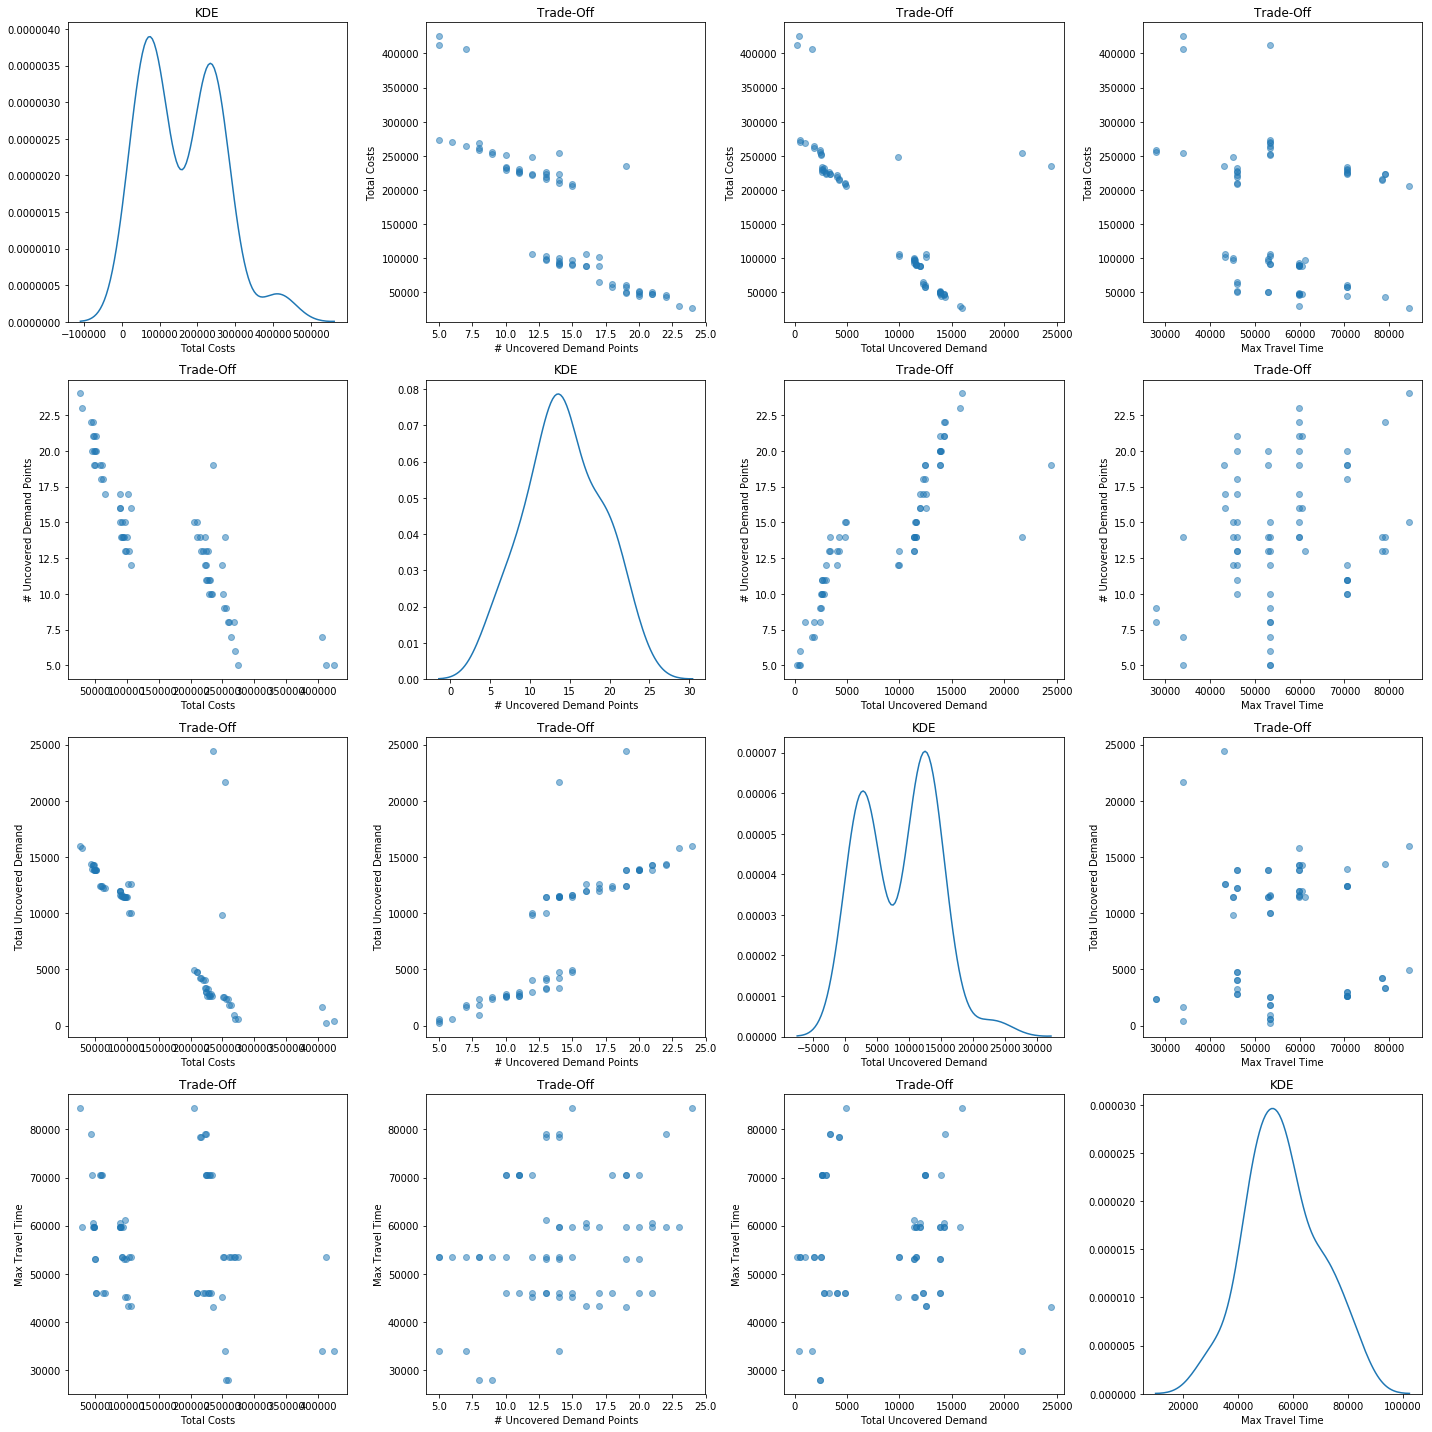

In [31]:
fig = plt.figure(figsize=(20,20))

position = 0
for i,ooi in enumerate(oois):
    for j,ooi2 in enumerate(oois):
        if i == j:
            ax = fig.add_subplot(4,4,position+1)
            sns.kdeplot(PFtest[:,i], ax=ax)
            ax.set_title("KDE")
            ax.set_xlabel(oois[i])
            position+=1
            continue
        ax = fig.add_subplot(4,4,position+1)
        position +=1
        ax.scatter(PFtest[:,j],PFtest[:,i], alpha=0.5)
        ax.set_title("Trade-Off")
        ax.set_ylabel(oois[i])
        ax.set_xlabel(oois[j])
#         plt.show()
fig.tight_layout()
plt.savefig("{}/{}/Analysis/Objective-Scatter".format(case,output_folder),dpi=600)
plt.show()

## Check correlation

In [35]:
from scipy.stats import pearsonr

In [36]:
PFtest.shape

(68, 4)

In [37]:
tmpDF = pd.DataFrame(PFtest)

In [38]:
tmpDF.columns = oois

In [39]:
corr_matrix = tmpDF.corr()
corr_matrix

,Total Costs,# Uncovered Demand Points,Total Uncovered Demand,Max Travel Time
Total Costs,1.000000,-0.863210,-0.765481,-0.266750
# Uncovered Demand Points,-0.863210,1.000000,0.829316,0.291435
Total Uncovered Demand,-0.765481,0.829316,1.000000,0.001974
Max Travel Time,-0.266750,0.291435,0.001974,1.000000


In [40]:
for col1 in tmpDF.columns:
    for col2 in tmpDF.columns:
        if col1 == col2:
            corr_matrix.loc[col1,col2] = 'X'
            break
        corr, p = pearsonr(tmpDF[col1],tmpDF[col2])
        if p < 0.05:
            print (col1,col2,corr,p)
        else:
#             corr_matrix.set_value(col1,col2,0)
#             corr_matrix.set_value(col2,col1,int(0))
            corr_matrix.loc[col1,col2] = 'Not Significant'
            corr_matrix.loc[col2,col1] = 'Not Significant'

# Uncovered Demand Points Total Costs -0.8632101316118811 2.888473205100061e-21
Total Uncovered Demand Total Costs -0.7654806044442185 2.9144784617044134e-14
Total Uncovered Demand # Uncovered Demand Points 0.8293164080571062 2.4367370225750466e-18
Max Travel Time Total Costs -0.2667497861588395 0.027884775821374122
Max Travel Time # Uncovered Demand Points 0.291434939073328 0.015896914293785168


In [41]:
corr_matrix

,Total Costs,# Uncovered Demand Points,Total Uncovered Demand,Max Travel Time
Total Costs,X,-0.86321,-0.765481,-0.26675
# Uncovered Demand Points,-0.86321,X,0.829316,0.291435
Total Uncovered Demand,-0.765481,0.829316,X,Not Significant
Max Travel Time,-0.26675,0.291435,Not Significant,X


In [43]:
# fig = plt.figure(figsize=(20,20))

# position = 0
# for i,ooi in enumerate(oois):
#     for j,ooi2 in enumerate(oois):
#         if i == j:
# #             ax = fig.add_subplot(4,4,position+1)
# #             sns.kdeplot(PFtest[:,i], ax=ax)
# #             ax.set_title("KDE")
# #             ax.set_xlabel(oois[i])
#             position+=1
#             continue
#         if j>i:
#             position+=1
#             continue
#         ax = fig.add_subplot(4,4,position+1)
#         position +=1
#         ax.scatter(PFtest[:,j],PFtest[:,i], alpha=0.5)
# #         ax.set_title("Trade-Off")
        
#         if j == 0:
#             ax.set_ylabel(oois[i],fontsize=20)
#         if i == 3:
#             ax.set_xlabel(oois[j], fontsize=20)
# #         plt.show()
# fig.tight_layout()
# plt.show()

# As parallel coordinate plot

In [42]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go


In [43]:
df_PF = pd.DataFrame(PFtest)

In [44]:
df_PF.columns=oois

In [45]:
objectives_nice = [
    'Total Costs', '# Uncovered Demand Points', 'Total Uncovered Demand',
    'Max Travel Time'
]

In [46]:
df_PF.head(2)

,Total Costs,# Uncovered Demand Points,Total Uncovered Demand,Max Travel Time
0,254010.006208,14.0,21653.465661,33886.375193
1,103742.110580,13.0,10003.337274,53409.117993


<b>TODO: Add Robustness score as colour</b>

In [47]:
PLfig = [
    go.Parcoords(
        line=dict(color='blue'),
        dimensions=list([
            dict(
                #                 range = ,
                label=oois[0],
                values=df_PF[oois[0]]),
            dict(
                #                 range = ,
                label=oois[1],
                values=df_PF[oois[1]]),
            dict(
                #                 range = ,
                label=oois[2],
                values=df_PF[oois[2]]),
            dict(
                #                 range = ,
                label=oois[3],
                values=df_PF[oois[3]]),
            ###other dicts
        ]))
]

In [48]:
fig = go.Figure(data=PLfig)

In [49]:
plotly.offline.init_notebook_mode(connected=True)

In [50]:
plotly.offline.iplot(fig)

### Select a solution

In [104]:
PLfig2 = [
    go.Parcoords(
        line=dict(color='blue'),
        ids=df_PF.index,
        dimensions=list([
            dict(
                #                 range = ,
                label=oois[0],
                values=df_PF[oois[0]]),
            dict(
                #                 range = ,
                label=oois[1],
                values=df_PF[oois[1]]),
            dict(
                #                 range = ,
                label=oois[2],
                values=df_PF[oois[2]]),
            dict(
                #                 range = ,
                label=oois[3],
                values=df_PF[oois[3]]),
#             dict(
#                 #                 range = ,
#                 label='index',
#                 values=df_PF.index),
            ###other dicts
        ]),
    hoverinfo=df_PF.index
    )
]

In [167]:
## TODO: Increase size, for saving with higher DPI
# (i.e layout['width'] and layout['height']), 

In [105]:
fig2 = go.Figure(data=PLfig2)

In [106]:
a = plotly.offline.iplot(fig2)

## match indexes of scores with policies

In [117]:
indexes_PF_solutions = testPF[:,0].astype(int)

In [118]:
PF_pols = p4_pols[indexes_PF_solutions]

In [120]:
PF_pols.shape

(68,)

In [122]:
df_PF.shape

(68, 4)

## Select the right policies & Pols

In [133]:
# Solution with lowest MTT and reasonable #UDPs
df_PF[(df_PF['Max Travel Time'] < 30000) & (df_PF['# Uncovered Demand Points'] < 8.5)]

,Total Costs,# Uncovered Demand Points,Total Uncovered Demand,Max Travel Time
58,258987.925823,8.0,2396.950542,27851.337183


In [135]:
# Solution with lowest #UDPs and reasonable MTT
df_PF[(df_PF['Max Travel Time'] < 40000) & (df_PF['# Uncovered Demand Points'] < 6)]

,Total Costs,# Uncovered Demand Points,Total Uncovered Demand,Max Travel Time
40,425579.35517,5.0,415.119463,33886.375193


In [159]:
# Solution with lowest Cost and reasonable #UDPs
df_PF[(df_PF['Total Costs'] < 150000) & (df_PF['# Uncovered Demand Points'] < 13)]

,Total Costs,# Uncovered Demand Points,Total Uncovered Demand,Max Travel Time
21,106926.901613,12.0,9990.135682,53409.117993


In [163]:
# Solution with lowest Cost and reasonable MTT
# df_PF[(df_PF['Total Costs'] < 150000) & (df_PF['Max Travel Time'] < 45000)]
df_PF[df_PF['Total Costs'] == df_PF['Total Costs'].min()]

,Total Costs,# Uncovered Demand Points,Total Uncovered Demand,Max Travel Time
28,26690.850496,24.0,15967.068236,84487.954937


In [164]:
selected_pols = {}

selected_pols['Low_MTT'] = PF_pols[58]

selected_pols['Low_nUDPs'] = PF_pols[40]

selected_pols['Low_Costs_Reas_UDPs'] = PF_pols[21]

# selected_pols['Low_Costs_Reas_MTT'] = PF_pols[38]
selected_pols['Lowest_Costs'] = PF_pols[28]


## Plot Those locations

In [165]:
for name, pol in selected_pols.items():
    result = FL_model(
        unit_opening_costs=Fix_Unc.best_estimate['unit_opening_costs'],
        unit_transport_cost=Fix_Unc.best_estimate['unit_transport_cost'],
        FL_operations_cost=Fix_Unc.best_estimate['FL_operations_cost'],
        demand_per_affected=Fix_Unc.best_estimate['demand_per_affected'],
        graphical_representation=True,
        FL_range=Fix_Unc.best_estimate['FL_range'],
        dist_method='from_table',
        table_dir="{}/Prepared Input Data/routing_table.csv".format(case),
        **SPX,
        **SPY,
        **DPX,
        **DPY,
        **FLX,
        **FLY,
        **pol,
        **DSRDP,
        **DSRFL,
        **DPpop)
    print("Map shows:",name,"below")
    display(result[5])

Map shows: Low_MTT below


Map shows: Low_nUDPs below


Map shows: Low_Costs_Reas_UDPs below


Map shows: Lowest_Costs below
